# 🚢 **Titanic survival prediction**
___

## 📃**The Problem** ##
This is a notebook about the famous Titanic survival prediction. This is a  supervized, classification batch lelarning problem.

⚙ **Setup**

In [56]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import warnings


parent_dir = os.path.abspath("..")
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
    
from _custom_func import extract_data


sns.set_style("darkgrid")
pd.set_option("display.max_columns", None)
sklearn.set_config(display="diagram")


warnings.filterwarnings("ignore")

print("\n💯 😊 Setup successfully loaded to memory.")


💯 😊 Setup successfully loaded to memory.


## 📝 **Get the data**

The data is the famouus titanic dataset, downloaded from 👉 [here](https://kagggke.com/).

In [2]:
try:
    extract_data("../datasets/Titanic-Dataset.zip")
    df = pd.read_csv("./data/Titanic-Dataset.csv")
    print("\nData loaded successfully . . .")
    print("Display the data with : \033[035mdf.head()\033[0m")
except Exception as e:
    print("\033[031mError in loading data . . .\033[0m\n", e)


Data loaded successfully . . .
Display the data with : df.head()


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 🔎 **Explore the data**

Exploring the data through summary statistics and visualizations to gain insights.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The `Age` and `Cabin` attributes were missinng for some passengers.

**Get summary statistics for the neccessary attrributes.**

In [5]:
df_num = df.select_dtypes(include=np.number)
df_num.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The median age is $28$, meaning that half of the total passengers have ages that are less than or equal to $28$. The maximum age is $80$, meaning that there are children, youtg and adults in the ship. The mean age is $29$, that is most passengers are youths. The age attribute was not copletely recorded.

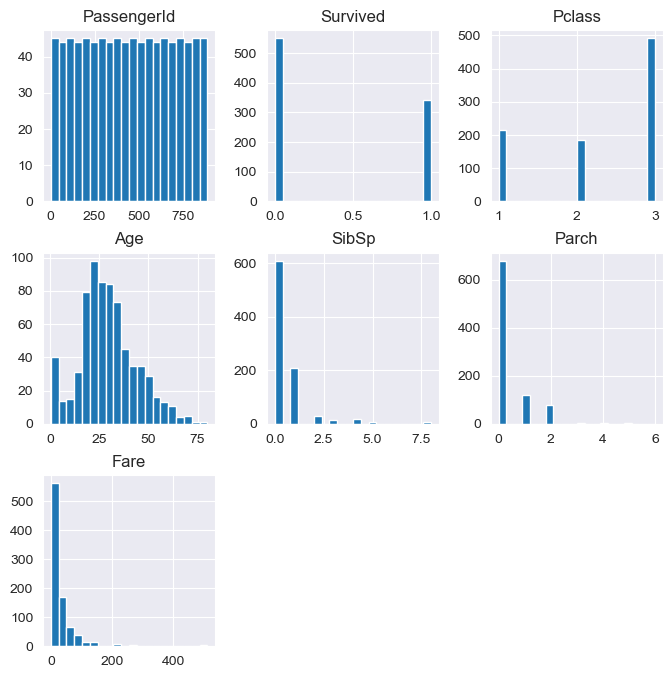

In [6]:
ax = df_num.hist(bins=20, figsize=(8,8))
plt.show()

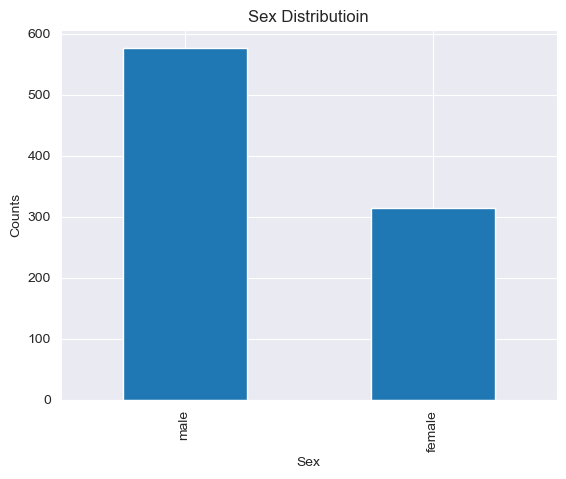

In [7]:
ax = df.Sex.value_counts().plot.bar()
ax.set_title("Sex Distributioin")
ax.yaxis.set_label_text("Counts")
plt.show()

- There are more male passengers than female passengers.
- The proportion of passengers that survived is less than 50%
- Most of the passengers have no siblings, spouses, parents or children.
- The age of the passengers is approximately normal, that is most of them have ages between 25 and 35.
- There are no outliers in the dataset.

**Correllations**

To see how each variable correlates with the other.

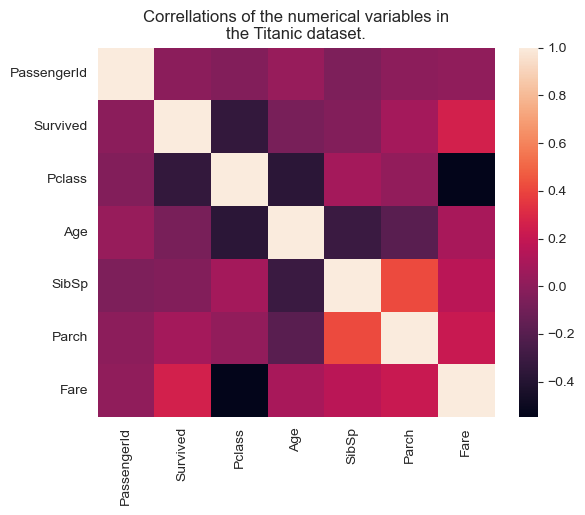

In [8]:
correllation_matrix = df_num.corr()
ax = sns.heatmap(correllation_matrix)
cor_matrix_titile = ax.set_title("Correllations of the numerical variables in\nthe Titanic dataset.")

It is seen that the number of simblingsspouses aboard is proportional to the number of parents/chidren aboard. Hopefully, there are many instances where the whole extended family was aboard. Also, the fare is correllated with the survival status. It might be that the first class passengers had a high chance of being survived, and this is evident from the correlation between Pclass and fare. A high fare means a lower Pclass.

**Gender Ditribution**

To see which gender survived the most.

In [9]:
df_male = df[df["Sex"] == "male"]
df_female = df[df["Sex"] == "female"]

In [10]:
total_survuved_male = (df_male.Survived == 1).sum()
total_survuved_female = (df_female.Survived == 1).sum()

total_survuved = (df.Survived == 1).sum()

In [11]:
summary_sex = {
    "Sex": ["male", "female"],
    "total": [len(df_male), len(df_female)],
    "total_survived": [total_survuved_male, total_survuved_female],
    "% survived per gender": [100*total_survuved_male/len(df_male), 100*total_survuved_female/len(df_female)],
    "% survived in all passenger": [100*total_survuved_male/len(df), 100*total_survuved_female/len(df)],
    "% survived in survived": [100*total_survuved_male/total_survuved, 100*total_survuved_female/total_survuved],
}

<div id="sex_eda"></div>

In [12]:
summary_sex_table = pd.DataFrame(summary_sex)
summary_sex_table

,Sex,total,total_survived,% survived per gender,% survived in all passenger,% survived in survived
0,male,577,109,18.890815,12.233446,31.871345
1,female,314,233,74.203822,26.150393,68.128655


Interestingly, more female survived the harvoc that the male. In fact, 68% of those that survived are females.

## 🛠 Prepare the data for machine learning

The data contains the features and the target, so these needs to be separated. The data also needs to be splitted into training set and test set. Sinnce the Sex attribute is very important (evident from the [eda](#sex_eda) 👈),  the splitting will carrid out using Stratifoed Sampling.

Some features have no effect machine learning algorithms and model-- PasengerId, Ticket, Name. These features will be dropped.

Some features also contains missinng data--Age and Cabin.

The missinng `Cabin` attribute will be filled with most frequent and the age will be filled with the median age (Evident from the shape of the age distribution).

The features in the dataset are in different scale and machine learning systems do not perform well with these, so the features will be scaled using Standard Scaler from scikit-learn.

___
*Working on a copy of the dataset*

### ✂ Split the data

In [16]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in splitter.split(df_titanic, df_titanic["Sex"]):
    train_set = df_titanic.loc[train_index]
    test_set = df_titanic.loc[test_index]

☑ **Verify that the split was performed as expected**

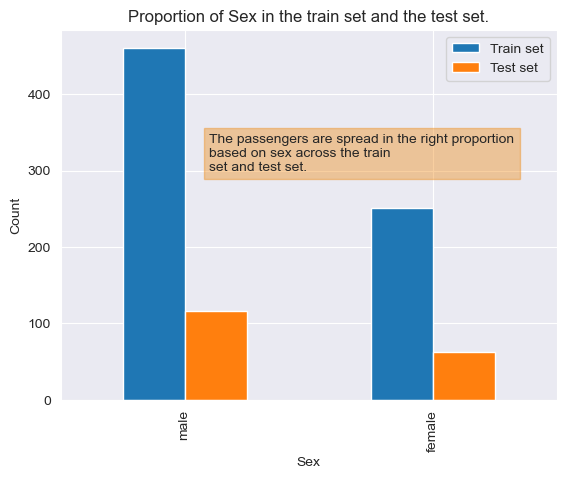

In [48]:
ax = pd.concat([
        pd.DataFrame(train_set.Sex.value_counts()),
        pd.DataFrame(test_set.Sex.value_counts())], axis=1).plot.bar()
ax.legend(["Train set", "Test set"])
ax.yaxis.set_label_text("Count")
ax.set_title("Proportion of Sex in the train set and the test set.")
ax.text(0.1, 300, "The passengers are spread in the right proportion\nbased on sex across the train\nset and test set.",
       bbox={"color": "#ef8912", "alpha": 0.4});

### ❌ Remove ineffective features from the dataset
- Name
- Ticket
- PassengerId

In [55]:
train_set.drop(["PassengerId", "Name", "Sex"], axis=1, inplace=True)
test_set.drop(["PassengerId", "Name", "Sex"], axis=1, inplace=True)

### 💽 Data Preprocessing